In [33]:
import pandas as pd
import numpy as np
from statsmodels.tsa.statespace.varmax import VARMAX
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import matplotlib.pyplot as plt

from sklearn.metrics import mean_absolute_percentage_error, mean_squared_error, r2_score

In [34]:
file_path = '/content/LG.csv'

# Đọc dữ liệu từ file CSV
df = pd.read_csv(file_path, index_col='Date', parse_dates=True)

In [35]:
df

,Close,Open,High,Low
Date,,,,
2019-03-04,71200,70800,71800,70800
2019-03-05,71300,70900,72000,70300
2019-03-06,74400,72300,74600,72300
2019-03-07,75100,75200,76700,74200
2019-03-08,73700,75000,76100,73300
...,...,...,...,...
2024-05-21,96500,97000,97800,96000
2024-05-22,95300,96700,96900,95100
2024-05-23,95400,96000,97300,95400


In [36]:
# Định nghĩa hàm kiểm tra tính dừng
def check_stationarity(data):
    for col in data.columns:
        result = adfuller(data[col])
        print(f'Kiểm tra tính dừng cho cột {col}:')
        print(f'ADF Statistic: {result[0]}')
        print(f'p-value: {result[1]}')
        print(f'Critical Values:')
        for key, value in result[4].items():
            print(f'   {key}: {value}')
        print(f'==> {"Không phải" if result[1] > 0.05 else "Là"} chuỗi dừng\n')

# Gọi hàm kiểm tra tính dừng với DataFrame của bạn
check_stationarity(df)

Kiểm tra tính dừng cho cột Close:
ADF Statistic: -2.009368546878018
p-value: 0.2824804859721475
Critical Values:
   1%: -3.43476120520139
   5%: -2.863488262178673
   10%: -2.567807233388883
==> Không phải chuỗi dừng

Kiểm tra tính dừng cho cột Open:
ADF Statistic: -2.0044297063010297
p-value: 0.28463421137984224
Critical Values:
   1%: -3.43476120520139
   5%: -2.863488262178673
   10%: -2.567807233388883
==> Không phải chuỗi dừng

Kiểm tra tính dừng cho cột High:
ADF Statistic: -2.0642941576816356
p-value: 0.2591122667479344
Critical Values:
   1%: -3.4347701503050163
   5%: -2.8634922099733666
   10%: -2.5678093356353617
==> Không phải chuỗi dừng

Kiểm tra tính dừng cho cột Low:
ADF Statistic: -1.9524047126004813
p-value: 0.30782367456200704
Critical Values:
   1%: -3.4347641828771405
   5%: -2.863489576334964
   10%: -2.5678079331921446
==> Không phải chuỗi dừng



In [37]:
from sklearn.model_selection import train_test_split

# chia bộ dữ liệu theo tỉ lệ 6:4
train, test = train_test_split(df, test_size=0.4, shuffle=False)

# dùng diff để chuyển đổi bộ dữ liệu
train_diff = train.diff()
train_diff.dropna(inplace = True)

In [38]:
# Định nghĩa hàm kiểm tra tính dừng
def check_stationarity(data):
    for col in data.columns:
        result = adfuller(data[col])
        print(f'Kiểm tra tính dừng cho cột {col}:')
        print(f'ADF Statistic: {result[0]}')
        print(f'p-value: {result[1]}')
        print(f'Critical Values:')
        for key, value in result[4].items():
            print(f'   {key}: {value}')
        print(f'==> {"Không phải" if result[1] > 0.05 else "Là"} chuỗi dừng\n')

# Gọi hàm kiểm tra tính dừng với DataFrame của bạn
check_stationarity(train_diff)

Kiểm tra tính dừng cho cột Close:
ADF Statistic: -4.941102450941431
p-value: 2.898827893929222e-05
Critical Values:
   1%: -3.4377858660487277
   5%: -2.86482248517442
   10%: -2.5685178285796555
==> Là chuỗi dừng

Kiểm tra tính dừng cho cột Open:
ADF Statistic: -4.919405761902397
p-value: 3.196472362201491e-05
Critical Values:
   1%: -3.4377858660487277
   5%: -2.86482248517442
   10%: -2.5685178285796555
==> Là chuỗi dừng

Kiểm tra tính dừng cho cột High:
ADF Statistic: -4.737297844350527
p-value: 7.157505834589672e-05
Critical Values:
   1%: -3.4377858660487277
   5%: -2.86482248517442
   10%: -2.5685178285796555
==> Là chuỗi dừng

Kiểm tra tính dừng cho cột Low:
ADF Statistic: -5.011551531758785
p-value: 2.1054065842237138e-05
Critical Values:
   1%: -3.4377943310889303
   5%: -2.8648262173548456
   10%: -2.5685198165973295
==> Là chuỗi dừng



In [39]:
!pip install pmdarima

In [40]:
from pmdarima import auto_arima
import pandas as pd
pq = []
for column in train_diff:
    print(f'Searching order of p and q for : {column}')
    stepwise_model = auto_arima(train_diff[column],start_p=1, start_q=1,max_p=7, max_q=7, seasonal=False,
        trace=True,error_action='ignore',suppress_warnings=True, stepwise=True,maxiter=1000)

    parameter = stepwise_model.get_params().get('order')
    print(f'optimal order for:{column} is: {parameter} \n\n')
    pq.append(stepwise_model.get_params().get('order'))

Searching order of p and q for : Close
Performing stepwise search to minimize aic
 ARIMA(1,0,1)(0,0,0)[0]             : AIC=16900.249, Time=0.15 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=16897.092, Time=0.03 sec
 ARIMA(1,0,0)(0,0,0)[0]             : AIC=16898.345, Time=0.05 sec
 ARIMA(0,0,1)(0,0,0)[0]             : AIC=16898.319, Time=0.05 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=16898.689, Time=0.05 sec

Best model:  ARIMA(0,0,0)(0,0,0)[0]          
Total fit time: 0.334 seconds
optimal order for:Close is: (0, 0, 0) 


Searching order of p and q for : Open
Performing stepwise search to minimize aic
 ARIMA(1,0,1)(0,0,0)[0]             : AIC=16955.171, Time=0.07 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=16962.209, Time=0.03 sec
 ARIMA(1,0,0)(0,0,0)[0]             : AIC=16953.202, Time=0.04 sec
 ARIMA(0,0,1)(0,0,0)[0]             : AIC=16953.654, Time=0.05 sec
 ARIMA(2,0,0)(0,0,0)[0]             : AIC=16955.131, Time=0.07 sec
 ARIMA(2,0,1)(0,0,0)[0]             : AIC=16956.3

In [43]:

model = VARMAX(train_diff, order=(1, 0))
results = model.fit()

print(results.summary())


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


                                  Statespace Model Results                                  
Dep. Variable:     ['Close', 'Open', 'High', 'Low']   No. Observations:                  903
Model:                                       VAR(1)   Log Likelihood              -31850.419
                                        + intercept   AIC                          63760.838
Date:                              Sun, 02 Jun 2024   BIC                          63905.010
Time:                                      13:47:47   HQIC                         63815.904
Sample:                                           0                                         
                                              - 903                                         
Covariance Type:                                opg                                         
Ljung-Box (L1) (Q):     0.02, 136.84, 30.17, 22.80   Jarque-Bera (JB):   11282.99, 2625.70, 1986.43, 2793.40
Prob(Q):                    0.89, 0.00, 0.00, 0.00   P

In [44]:
predict = results.get_prediction(start = len(train), end = len(train) + len(test) - 1)
predicts = predict.predicted_mean

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


In [45]:
predicts.columns = ['Open_predicted', 'High_predicted', 'Low_predicted', 'Close_predicted']
predicts['Date'] = test.index
predicts
predicts_date = predicts.set_index('Date')
predicts_date

,Open_predicted,High_predicted,Low_predicted,Close_predicted
Date,,,,
2022-04-19,1.659144,481.284494,534.855782,-133.304644
2022-04-20,89.384687,-74.727225,-147.411522,217.488365
2022-04-21,45.551799,117.164388,152.593284,-28.015405
2022-04-22,64.393862,34.082982,19.340730,101.674200
2022-04-25,57.129792,71.577937,77.276492,37.196573
...,...,...,...,...
2024-05-21,59.036110,60.020249,60.030613,58.361983
2024-05-22,59.036110,60.020249,60.030613,58.361983
2024-05-23,59.036110,60.020249,60.030613,58.361983


In [46]:
# Lấy giá trị cuối cùng của dữ liệu gốc trước khi diff
last_original_values = df.iloc[len(train)-1]


# Lấy giá trị cuối cùng của dữ liệu gốc trước khi diff
last_original_values = df.iloc[-len(test) - 1]
# Tạo một DataFrame để chứa các giá trị dự đoán gốc
forecast_original_data = pd.DataFrame(columns=['Open', 'High', 'Low', 'Close'], index=test.index)

# Khởi tạo giá trị bắt đầu với giá trị cuối cùng của dữ liệu gốc
current_values = last_original_values.copy()

# Thực hiện inverse differencing cho từng ngày dự đoán
for index, row in predicts_date.iterrows():
    current_values['Open'] += row['Open_predicted']
    current_values['High'] += row['High_predicted']
    current_values['Low'] += row['Low_predicted']
    current_values['Close'] += row['Close_predicted']
    # Thêm giá trị hiện tại vào DataFrame kết quả
    forecast_original_data.loc[index] = current_values

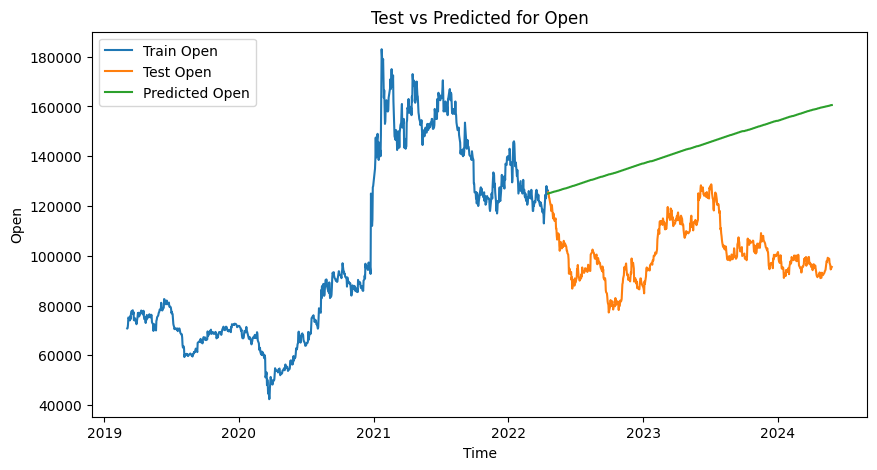

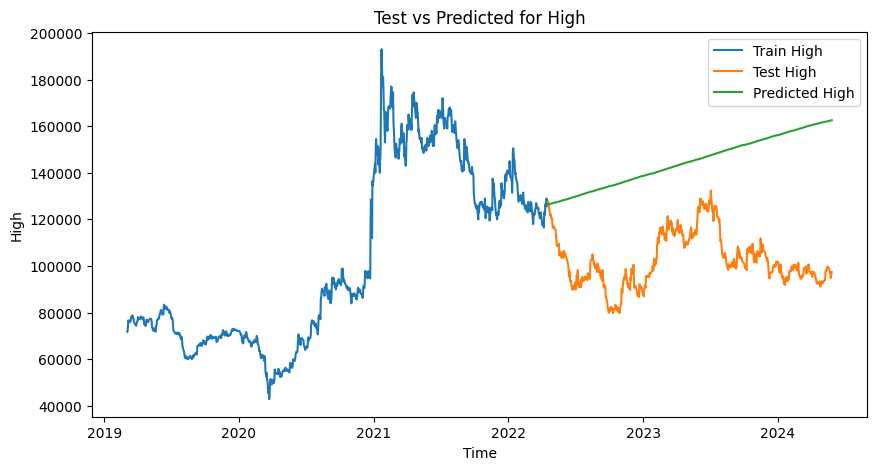

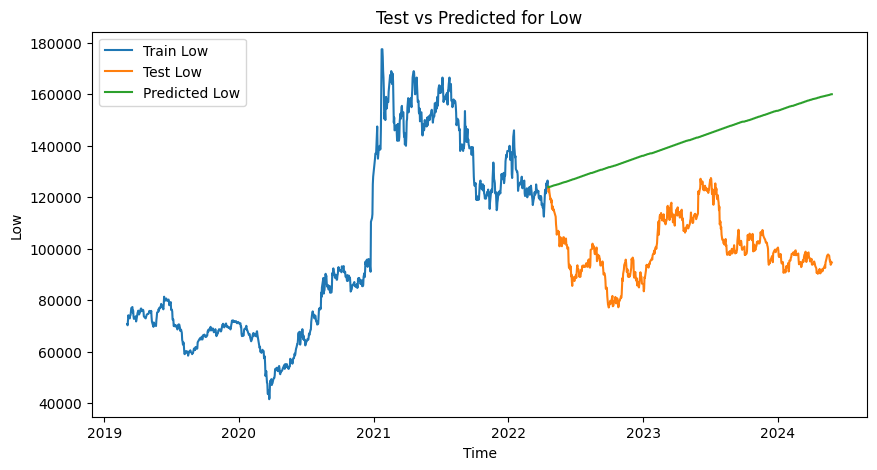

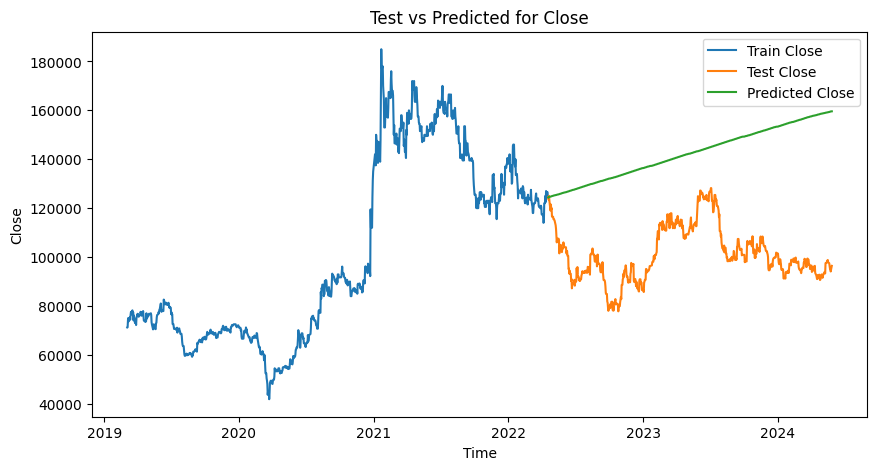

In [47]:
# Vẽ biểu đồ cho mỗi cặp cột
for col in ['Open', 'High', 'Low', 'Close']:
    plt.figure(figsize=(10, 5))
    plt.plot(train.index, train[col], label=f'Train {col}')
    plt.plot(test.index, test[col], label=f'Test {col}')
    plt.plot(forecast_original_data.index, forecast_original_data[col], label=f'Predicted {col}')
    plt.title(f'Test vs Predicted for {col}')
    plt.xlabel('Time')
    plt.ylabel(col)
    plt.legend()
    plt.show()

In [48]:


# Tính toán MAPE và RMSE
mape = mean_absolute_percentage_error(test, predicts_date)
rmse = np.sqrt(mean_squared_error(test, predicts_date))
mse = mean_squared_error(test, predicts_date)
r2 = r2_score(test, predicts_date)

print(f'MAPE: {mape:.4f}')
print(f'RMSE: {rmse:.4f}')
print(f'MSE: {mse:.4f}')
print(f'R²: {r2:.4f}')

results_GBM = pd.DataFrame([['Gradient Boosting', mape, mse, rmse, r2]],
               columns = ['Model', 'MAE', 'MSE', 'RMSE', 'R2 Score'])
results_GBM

MAPE: 0.9994
RMSE: 102194.2779
MSE: 10443670442.9152
R²: -82.2411


,Model,MAE,MSE,RMSE,R2 Score
0,Gradient Boosting,0.999407,1.044367e+10,102194.277936,-82.24107
